![alt text]({64C39F2E-D321-43BE-B082-C490FC7A8483}.png)


In [26]:
import timeit
import sys
import timeit
import matplotlib.pyplot as plt
import numpy as np
import math
import time
from decimal import Decimal, getcontext

![alt text](image.png)

In [27]:
# 1. Multiplicação repetida com laço for
def mult_repetida(x, n):
    resultado = 1.0
    for _ in range(n):
        resultado *= x
    return resultado

# 2. Uso do operador **
def operator_power(x, n):
    return x ** n

# 3. Exponenciação rápida recursiva (n >= 1)
def fast_exp(x, n):
    if n == 1:
        return x
    if n % 2 == 0:
        half = fast_exp(x, n // 2)
        return half * half
    else:
        return x * fast_exp(x, n - 1)

# Função para medição de tempo com timeit
def medir_tempo(funcao, x, n):
    setup = f"from __main__ import {funcao.__name__}"
    stmt = f"{funcao.__name__}({x}, {n})"
    tempo = timeit.timeit(stmt, setup=setup, number=1)
    return tempo, funcao(x, n)

# Valores de teste
x = 1.000001
ns = [100, 10000, 1000000, 100000000]

# Dados para armazenar resultados
resultados = {
    "Multiplicação Repetida": {"tempos": [], "valores": []},
    "Operador **": {"tempos": [], "valores": []},
    "Exponenciação Rápida": {"tempos": [], "valores": []}
}

# Executar medições
for n in ns:
    print(f"\n--- n = {n} ---")

    # Multiplicação repetida
    t, val = medir_tempo(mult_repetida, x, n)
    resultados["Multiplicação Repetida"]["tempos"].append(t)
    resultados["Multiplicação Repetida"]["valores"].append(val)
    print(f"Mult. Repetida: {val:.8f} | Tempo: {t:.6f} s")

    # Operador **
    t, val = medir_tempo(operator_power, x, n)
    resultados["Operador **"]["tempos"].append(t)
    resultados["Operador **"]["valores"].append(val)
    print(f"Operador **:    {val:.8f} | Tempo: {t:.6f} s")

    # Exponenciação rápida
    t, val = medir_tempo(fast_exp, x, n)
    resultados["Exponenciação Rápida"]["tempos"].append(t)
    resultados["Exponenciação Rápida"]["valores"].append(val)
    print(f"Exp. Rápida:    {val:.8f} | Tempo: {t:.6f} s")



--- n = 100 ---
Mult. Repetida: 1.00010000 | Tempo: 0.000007 s
Operador **:    1.00010000 | Tempo: 0.000003 s
Exp. Rápida:    1.00010000 | Tempo: 0.000005 s

--- n = 10000 ---
Mult. Repetida: 1.01005016 | Tempo: 0.000605 s
Operador **:    1.01005016 | Tempo: 0.000003 s
Exp. Rápida:    1.01005016 | Tempo: 0.000023 s

--- n = 1000000 ---
Mult. Repetida: 2.71828047 | Tempo: 0.044755 s
Operador **:    2.71828047 | Tempo: 0.000003 s
Exp. Rápida:    2.71828047 | Tempo: 0.000006 s

--- n = 100000000 ---
Mult. Repetida: 26879827172977655387289053805002455219437568.00000000 | Tempo: 4.863552 s
Operador **:    26879827172956263783410202433852198352846848.00000000 | Tempo: 0.000002 s
Exp. Rápida:    26879827129632417899990591718163420043804672.00000000 | Tempo: 0.000009 s


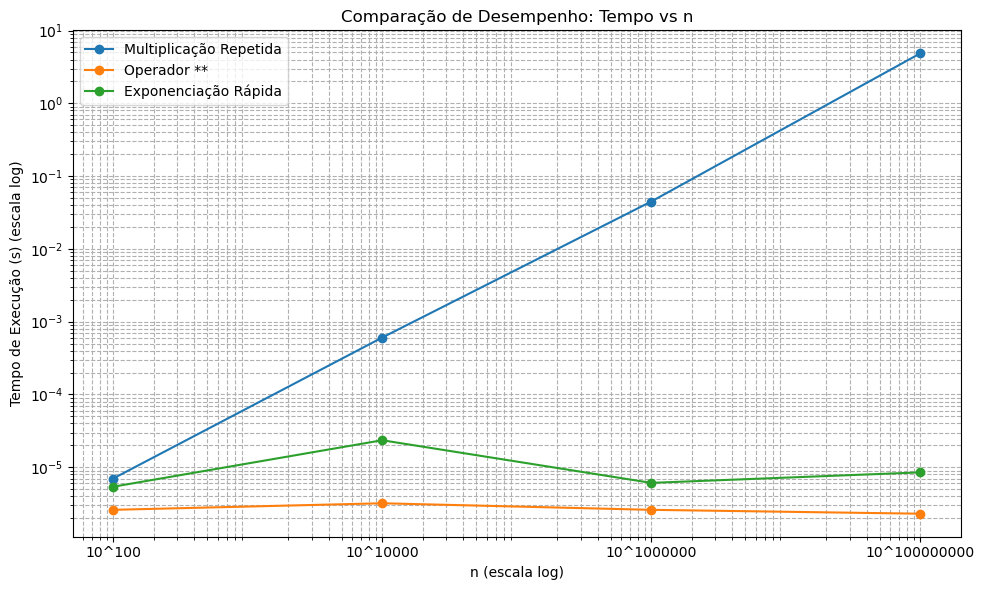

In [28]:
# Gráfico comparativo log-log
plt.figure(figsize=(10, 6))

for metodo, dados in resultados.items():
    plt.loglog(ns, dados["tempos"], 'o-', label=metodo)

plt.title('Comparação de Desempenho: Tempo vs n')
plt.xlabel('n (escala log)')
plt.ylabel('Tempo de Execução (s) (escala log)')
plt.grid(True, which="both", linestyle='--')
plt.legend()
plt.xticks(ns, [f'10^{int(i)}' for i in map(lambda x: x, ns)])
plt.tight_layout()
plt.show()


In [59]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

# 1. Multiplicação com laço for
def escala_for(alpha, x):
    y = np.empty_like(x)
    for i in range(len(x)):
        y[i] = alpha * x[i]
    return y

# 2. Abordagem vetorizada com NumPy
def escala_numpy(alpha, x):
    return alpha * x

# 3. Soma dos produtos com diferentes métodos
def soma_for(alpha, x):
    total = 0.0
    for i in range(len(x)):
        total += alpha * x[i]
    return total

def soma_numpy(alpha, x):
    return np.sum(alpha * x)

def soma_numpy_dot(alpha, x):
    return alpha * np.sum(x)

print(soma_for)


<function soma_for at 0x000001E40E1D4F40>


Quando se somam números em ponto flutuante, a ordem das operações pode afetar significativamente o resultado, especialmente quando há uma grande diferença de magnitude entre os termos.

Utilize as bibliotecas `numpy`, `matplotlib` e `decimal` quando necessário.

a)
Escreva um programa em Python que some os seguintes termos:

∑106i=11i2

Compare o resultado com o valor teórico da série:

∑∞i=11i2=π26

Calcule o erro absoluto e o erro relativo. O resultado está próximo do valor teórico?

b)
Modifique o programa para somar os termos em ordem crescente e depois em ordem decrescente de i
. Compare os dois resultados. Há diferença? Como você explica isso?

c)
Implemente a soma utilizando o algoritmo de compensação de Kahan, que reduz erros de arredondamento durante a soma de muitos termos. Compare com os resultados obtidos anteriormente.

d) (Exploração adicional: tipo de precisão)

- Refatore o código para que a soma também possa ser feita utilizando os tipos `numpy.float32`, `numpy.float64` e `decimal.Decimal`.
- Compare os resultados numéricos, tempos de execução e erros.
- Comente os prós e contras de usar maior precisão para esse tipo de operação.

Reflexão:
Este exercício mostra como erros acumulados em somas podem ser amplificados ou atenuados pela ordem de execução, precisão usada, e até mesmo escolha do algoritmo. Essa questão é central em ciência computacional e simulações de alta precisão, onde somas de muitos termos pequenos são frequentes.


Resultados Numéricos:

Precisão: float32
Padrão: 1.644725322723389 | Erro Abs: 2.0874e-04 | Erro Rel: 1.2690e-04
Ascendente: 1.644725322723389 | Erro Abs: 2.0874e-04 | Erro Rel: 1.2690e-04
Descendente: 1.644932985305786 | Erro Abs: 1.0815e-06 | Erro Rel: 6.5750e-07
Kahan: 1.644933104515076 | Erro Abs: 9.6233e-07 | Erro Rel: 5.8503e-07

Precisão: float64
Padrão: 1.644933066848770 | Erro Abs: 1.0000e-06 | Erro Rel: 6.0793e-07
Ascendente: 1.644933066848770 | Erro Abs: 1.0000e-06 | Erro Rel: 6.0793e-07
Descendente: 1.644933066848726 | Erro Abs: 1.0000e-06 | Erro Rel: 6.0793e-07
Kahan: 1.644933066848727 | Erro Abs: 1.0000e-06 | Erro Rel: 6.0793e-07

Decimal: 1.644933066848727 | Erro Abs: 1.0000e-06 | Erro Rel: 6.0793e-07 | Tempo: 0.8806s


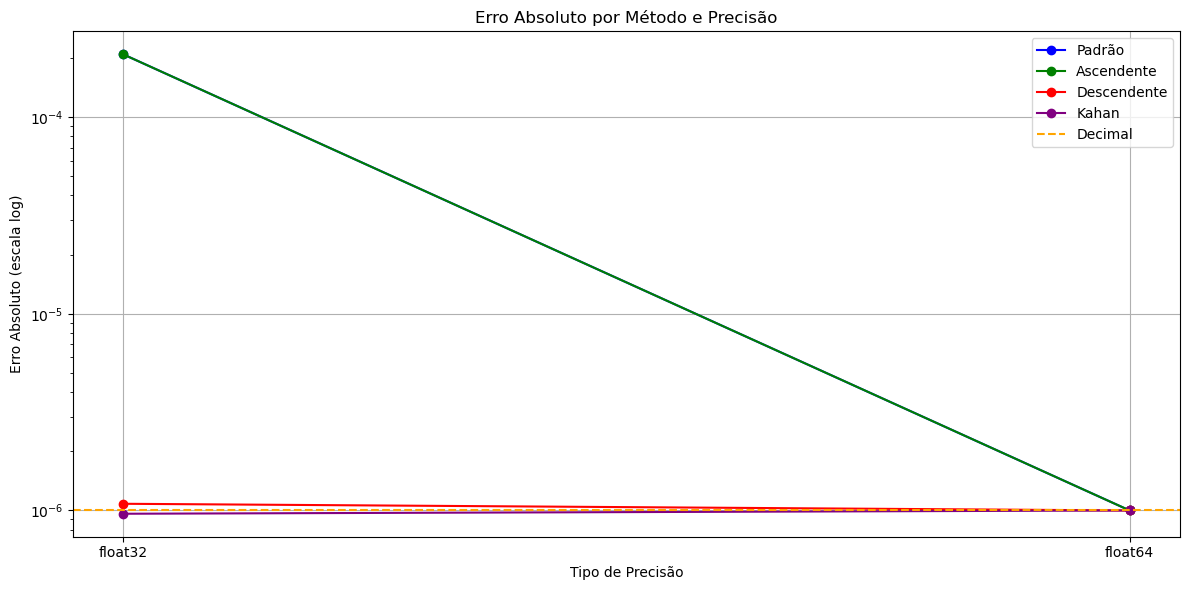

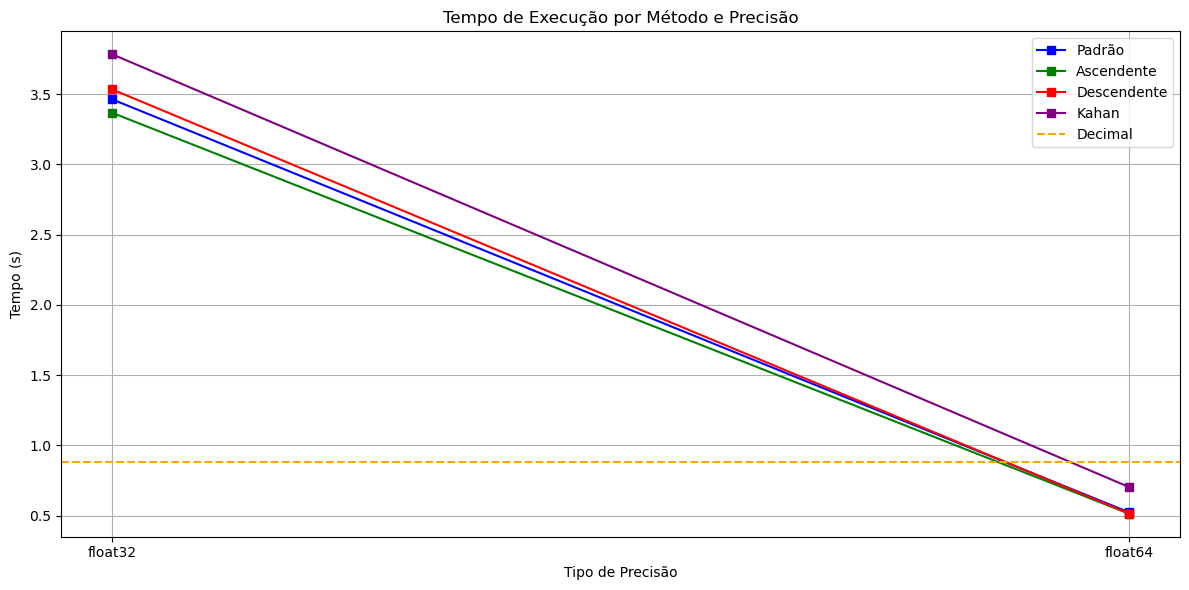

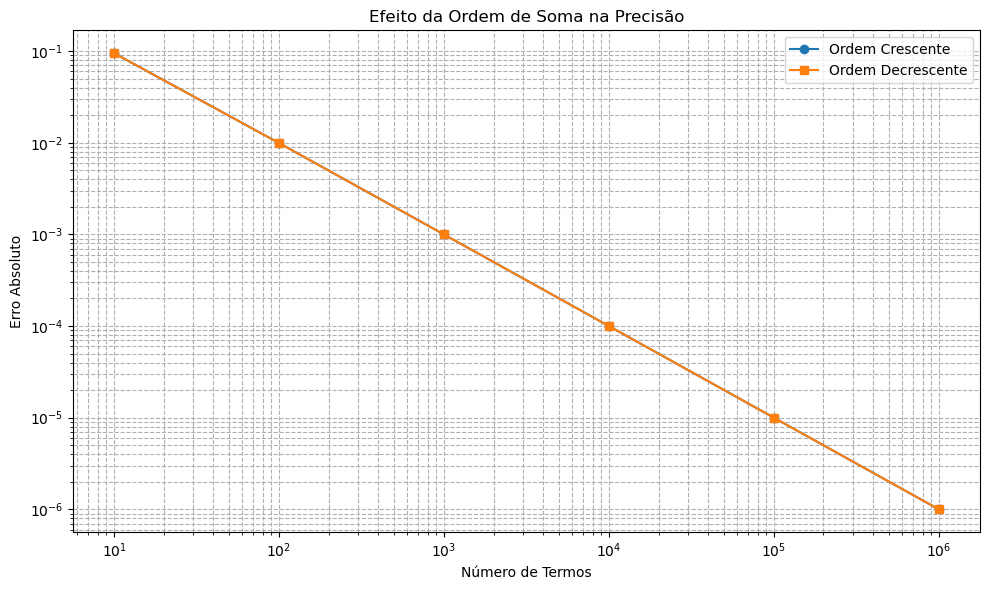

In [43]:
# a) Soma padrão da série
def soma_padrao(n, dtype=np.float64):
    soma = dtype(0)
    for i in range(1, n+1):
        soma += dtype(dtype(1) / dtype(i)**2)
    return soma

# b) Soma em diferentes ordens
def soma_ascendente(n, dtype=np.float64):
    soma = dtype(0)
    for i in range(1, n+1):
        soma += dtype(dtype(1) / dtype(i)**2)
    return soma

def soma_descendente(n, dtype=np.float64):
    soma = dtype(0)
    for i in range(n, 0, -1):
        soma += dtype(dtype(1) / dtype(i)**2)
    return soma

# c) Algoritmo de Kahan
def soma_kahan(n, dtype=np.float64):
    soma = dtype(0)
    compensacao = dtype(0)
    for i in range(1, n+1):
        termo = dtype(dtype(1) / dtype(i)**2 - compensacao)
        temp = soma + termo
        compensacao = (temp - soma) - termo
        soma = temp
    return soma

# d) Soma com Decimal (precisão arbitrária)
def soma_decimal(n, precisao=50):
    getcontext().prec = precisao
    soma = Decimal(0)
    for i in range(1, n+1):
        soma += Decimal(1) / Decimal(i)**2
    return soma

# Valor teórico da série
valor_teorico = math.pi**2 / 6

# Parâmetros
n = 10**6

tipos = [np.float32, np.float64]
nomes = ['float32', 'float64']
resultados = {}
tempos = {}
erros_abs = {}
erros_rel = {}

# Executa cálculos para diferentes tipos
for tipo, nome in zip(tipos, nomes):
    # Medição de tempo e cálculo
    start = time.time()
    padrao = soma_padrao(n, tipo)
    tempo_padrao = time.time() - start

    start = time.time()
    asc = soma_ascendente(n, tipo)
    tempo_asc = time.time() - start

    start = time.time()
    desc = soma_descendente(n, tipo)
    tempo_desc = time.time() - start

    start = time.time()
    kahan = soma_kahan(n, tipo)
    tempo_kahan = time.time() - start

    # Armazenamento dos resultados
    resultados[nome] = {
        'Padrão': padrao,
        'Ascendente': asc,
        'Descendente': desc,
        'Kahan': kahan
    }

    tempos[nome] = {
        'Padrão': tempo_padrao,
        'Ascendente': tempo_asc,
        'Descendente': tempo_desc,
        'Kahan': tempo_kahan
    }

    # Cálculo de erros
    erros_abs[nome] = {
        'Padrão': abs(padrao - valor_teorico),
        'Ascendente': abs(asc - valor_teorico),
        'Descendente': abs(desc - valor_teorico),
        'Kahan': abs(kahan - valor_teorico)
    }

    erros_rel[nome] = {
        'Padrão': erros_abs[nome]['Padrão'] / valor_teorico,
        'Ascendente': erros_abs[nome]['Ascendente'] / valor_teorico,
        'Descendente': erros_abs[nome]['Descendente'] / valor_teorico,
        'Kahan': erros_abs[nome]['Kahan'] / valor_teorico
    }

# Cálculo com Decimal
start = time.time()
dec_result = soma_decimal(n)
tempo_decimal = time.time() - start
erro_abs_decimal = abs(float(dec_result) - valor_teorico)
erro_rel_decimal = erro_abs_decimal / valor_teorico

# Impressão dos resultados
print("\nResultados Numéricos:")
for nome in nomes:
    print(f"\nPrecisão: {nome}")
    for metodo in ['Padrão', 'Ascendente', 'Descendente', 'Kahan']:
        print(f"{metodo}: {resultados[nome][metodo]:.15f} | "
              f"Erro Abs: {erros_abs[nome][metodo]:.4e} | "
              f"Erro Rel: {erros_rel[nome][metodo]:.4e}")

print(f"\nDecimal: {float(dec_result):.15f} | "
      f"Erro Abs: {erro_abs_decimal:.4e} | "
      f"Erro Rel: {erro_rel_decimal:.4e} | "
      f"Tempo: {tempo_decimal:.4f}s")

# Plotagem dos resultados
metodos = ['Padrão', 'Ascendente', 'Descendente', 'Kahan']
colors = ['blue', 'green', 'red', 'purple']

# Gráfico de erros absolutos
plt.figure(figsize=(12, 6))
for i, metodo in enumerate(metodos):
    erros = [erros_abs['float32'][metodo], erros_abs['float64'][metodo]]
    plt.plot(['float32', 'float64'], erros, 'o-', label=metodo, color=colors[i])
plt.axhline(y=erro_abs_decimal, color='orange', linestyle='--', label='Decimal')
plt.yscale('log')
plt.title('Erro Absoluto por Método e Precisão')
plt.xlabel('Tipo de Precisão')
plt.ylabel('Erro Absoluto (escala log)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('erros_absolutos.png')
plt.show()

# Gráfico de tempos de execução
plt.figure(figsize=(12, 6))
for i, metodo in enumerate(metodos):
    tempos_metodo = [tempos['float32'][metodo], tempos['float64'][metodo]]
    plt.plot(['float32', 'float64'], tempos_metodo, 's-', label=metodo, color=colors[i])
plt.axhline(y=tempo_decimal, color='orange', linestyle='--', label='Decimal')
plt.title('Tempo de Execução por Método e Precisão')
plt.xlabel('Tipo de Precisão')
plt.ylabel('Tempo (s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('tempos_execucao.png')
plt.show()

# Análise da ordem de soma
n_valores = [10**k for k in range(1, 7)]
asc_erros, desc_erros = [], []

for n_val in n_valores:
    asc = soma_ascendente(n_val, np.float64)
    desc = soma_descendente(n_val, np.float64)
    asc_erros.append(abs(asc - valor_teorico))
    desc_erros.append(abs(desc - valor_teorico))

plt.figure(figsize=(10, 6))
plt.loglog(n_valores, asc_erros, 'o-', label='Ordem Crescente')
plt.loglog(n_valores, desc_erros, 's-', label='Ordem Decrescente')
plt.title('Efeito da Ordem de Soma na Precisão')
plt.xlabel('Número de Termos')
plt.ylabel('Erro Absoluto')
plt.legend()
plt.grid(True, which="both", linestyle='--')
plt.tight_layout()
plt.savefig('ordem_soma.png')
plt.show()

In [ ]:
# 1. Multiplicação com laço for
def escala_for(alpha, x):
    y = np.empty_like(x)
    for i in range(len(x)):
        y[i] = alpha * x[i]
    return y
# 2. Abordagem vetorizada com NumPy
def escala_numpy(alpha, x):
    return alpha * x

# 3. Soma dos produtos com diferentes métodos
def soma_for(alpha, x):
    total = 0.0
    for i in range(len(x)):
        total += alpha * x[i]
    return total

def soma_numpy(alpha, x):
    return np.sum(alpha * x)

def soma_numpy_dot(alpha, x):
    return alpha * np.sum(x)


NameError: name 'tempo' is not defined

fortran:  Tempo (s):  0.60937500000000000
